In [0]:
import seaborn as sns
print(sns.__version__)

# se a versao for anterior a desejada.
# !pip install seaborn==0.9.0

# import seaborn as sns

0.9.0


# Analisando as notas em geral


In [0]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas.shape

(100836, 4)

In [0]:
notas.columns = ["usuarioID", "filmeId", "nota", "momento"]
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Ao importar um arquivo .csv pelo pandas, teremos um objeto do tipo <b> DATAFRAME </b>. Para este tipo de objeto, aplicam-se várias funções, ler a documentação do pandas para maiores informações. 

In [0]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Ao se selecionar apenas uma coluna dentro do dataframe, o objeto passa a ser do tipo <b> series </b>. Para esse tipo de objeto, novas funções podem ser aplicadas, vide documentação para maiores informações. 

Função **unique()** mostra os valores dentro da coluna, as categorias???

In [0]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [0]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

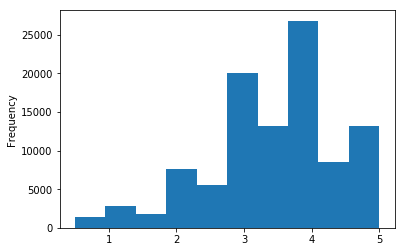

In [0]:
notas.nota.plot(kind='hist')

In [0]:
print(notas.nota.mean())
print(notas.nota.median())

3.501556983616962
3.5


In [0]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

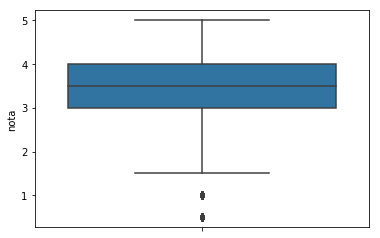

In [0]:
import seaborn as sns

sns.boxplot(y=notas.nota)

# Olhando os filmes

In [0]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando algumas notas especificas por filme


In [0]:
notas.query("filmeId==1").nota.mean()
#como se fosse um split dentro dos dados, uma pesquisa;

3.9209302325581397

In [0]:
notas.query("filmeId==2").nota.mean()


3.4318181818181817

In [0]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

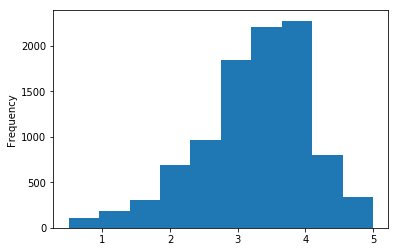

In [0]:
medias_por_filme.plot(kind="hist")

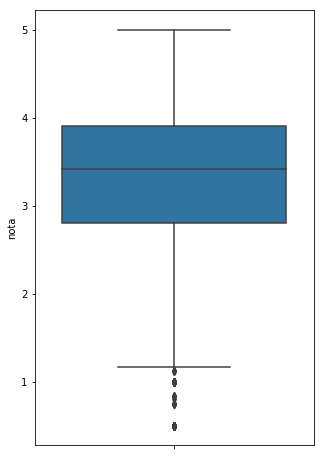

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

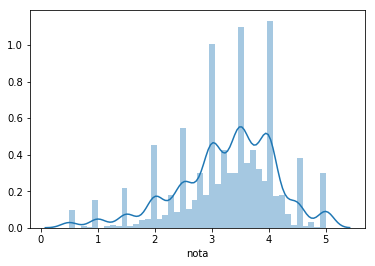

In [0]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

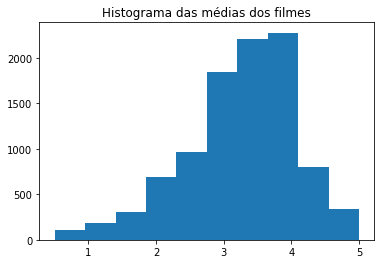

In [0]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [0]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
tmdb.original_language.unique() # categorica nominal 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
# primeiro grau
# segundo grau 
# terceiro grau
# 1 grau < 2 grau < 3 grau # categorica ordinal

In [0]:
# budget => orcamento => quantitativa continuo

In [0]:
# quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7
# quantitativa nao contínua


In [0]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'id', 'ro', 'ta', 'ar', 'cs', 'vi',
       'xx', 'is', 'af', 'nb', 'sl', 'pl', 'ky', 'no', 'tr', 'el', 'hu', 'ps',
       'te'],
      dtype='object')

In [0]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [0]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index() 
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


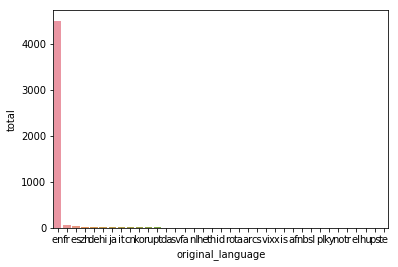

In [0]:
sns.barplot(x="original_language", y= "total", data = contagem_de_lingua)

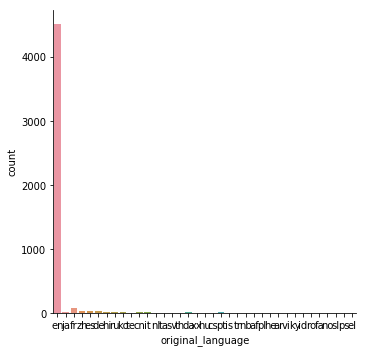

In [0]:
sns.catplot(x="original_language", kind="count", data= tmdb)

([<matplotlib.patches.Wedge at 0x7ff5c07ff400>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

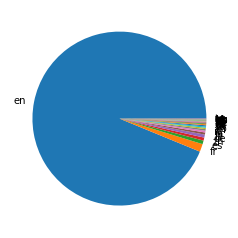

In [0]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])
# raramente se usa o gráfico do tipo pizza, torta (pie) pois a análise de área não é uma habilidade comum das pessoas.
# data visualization é uma área importante. Primeiro define-se qual a mensagem se quer passar, daí escolhe-se o tipo de grafico.

In [0]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


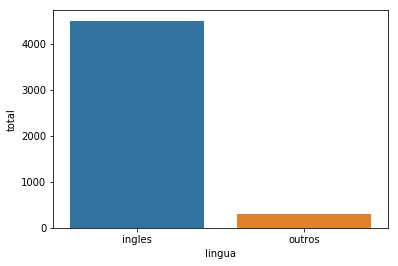

In [0]:
dados = {
    
    "lingua": ["ingles", "outros"],
    "total": [total_de_ingles, total_do_resto]
    
}
dados = pd.DataFrame(dados)
sns.barplot(x= "lingua", y="total", data = dados )


In [0]:
# A escolha do tipo de gráfico influencia muito se vamos conseguir ou não visualizar as informações dos dados


In [0]:
total_por_lingua_de_outros_filmes= tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
cs     2
ta     2
ar     2
ro     2
id     2
af     1
te     1
el     1
vi     1
ky     1
pl     1
hu     1
sl     1
is     1
ps     1
tr     1
xx     1
no     1
nb     1
Name: original_language, dtype: int64

In [0]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
filmes_sem_lingua_original_em_ingles.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


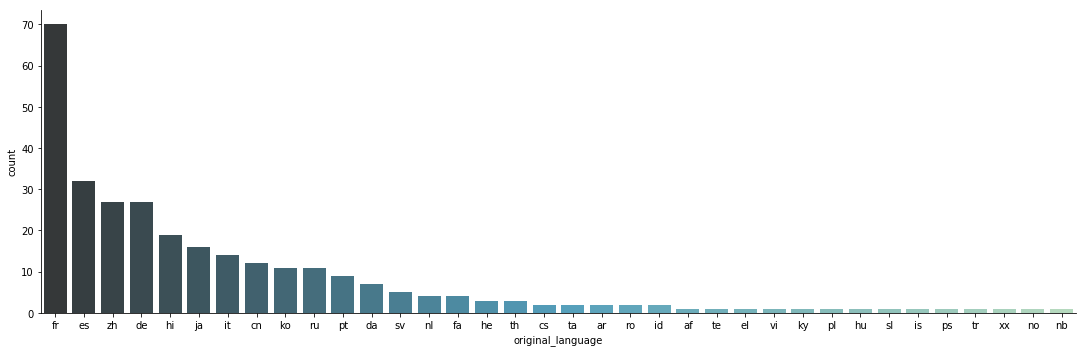

In [0]:
sns.catplot( x="original_language", kind="count",data = filmes_sem_lingua_original_em_ingles,
            aspect = 3,
            palette= "GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

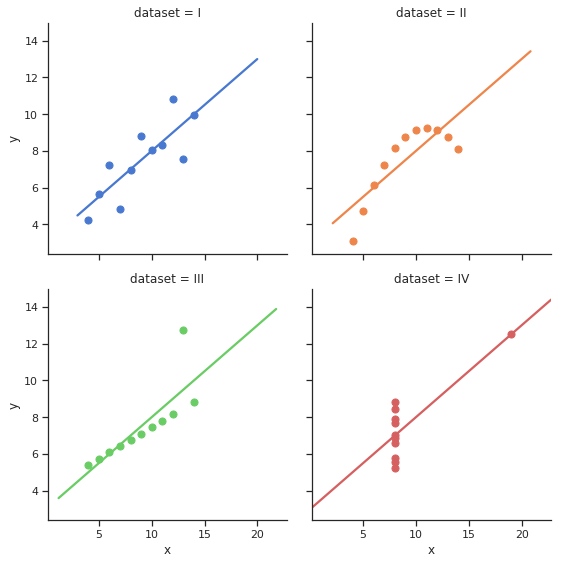

In [0]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma.

In [0]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [0]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [0]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [0]:
import numpy as np

filme1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
filme2 = np.append(np.array([5]*10), np.array([1]*10))

In [86]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


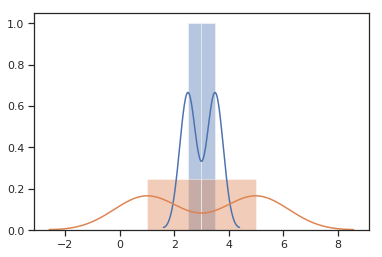

In [76]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

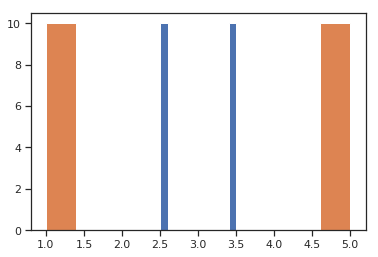

In [77]:
plt.hist(filme1)
plt.hist(filme2)

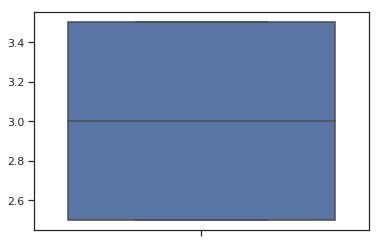

In [78]:
sns.boxplot(y=filme1)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff5bf505278>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5bf505b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5bf5115f8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5bf511278>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff5bf505400>,
  <matplotlib.lines.Line2D at 0x7ff5bf51b0b8>]}

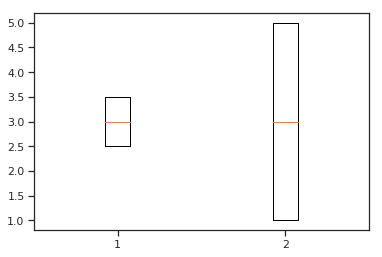

In [79]:
plt.boxplot([filme1, filme2])

AttributeError: ignored

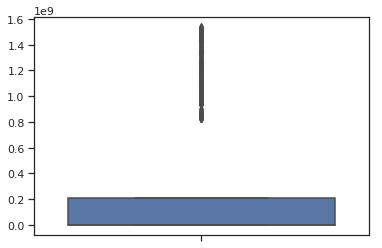

In [80]:
sns.boxplot(y=notas_do_toy_story).nota

{'boxes': [<matplotlib.lines.Line2D at 0x7ff5bf452d68>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5bf45c630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5bf4660f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5bf45cd30>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff5bf452ef0>,
  <matplotlib.lines.Line2D at 0x7ff5bf466b70>]}

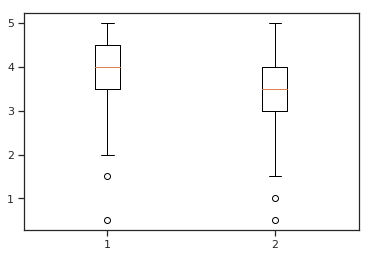

In [81]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

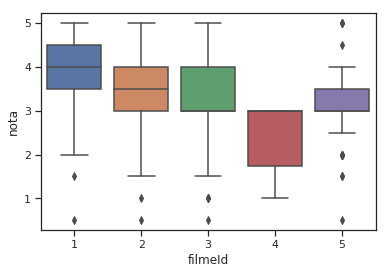

In [83]:
sns.boxplot(x = "filmeId", y ="nota", data = notas.query("filmeId in [1,2,3,4,5]"))

In [85]:
print(notas_do_jumanji.nota.std(), notas_do_toy_story.nota.std())

0.8817134921476455 0.8348591407114045


In [0]:
# O google possui google dataset search
# nova  ferramenta para buscar datasets para análise
